## Pre-processing, Feature Selection and Engineering

## 1. Generalized Pre-processing

### 1. Loading Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
items = pd.read_csv('datasets/item.csv')
sales = pd.read_csv('datasets/sales.csv')
supermarkets = pd.read_csv('datasets/supermarkets.csv')
promotions = pd.read_csv('datasets/promotion.csv')

`Basic observations show that the size of items datatype is inconsistent. Therefore we will be omitting the column`

In [4]:
def summarize_column_types(df):
    summary = df.dtypes.reset_index()
    summary.columns = ['Column Name', 'Pandas Data Type']
    return summary

In [5]:
summary_items = summarize_column_types(items)
summary_supermarkets = summarize_column_types(supermarkets)
summary_promotions = summarize_column_types(promotions)
summary_sales = summarize_column_types(sales)

print('items\n',summary_items, '\n')
print('supermarkets\n',summary_supermarkets, '\n')
print('sales\n',summary_sales, '\n')
print('promotions\n',summary_promotions, '\n')

items
   Column Name Pandas Data Type
0        code            int64
1  descrption           object
2        type           object
3       brand           object
4        size           object 

supermarkets
       Column Name Pandas Data Type
0  supermarket_No            int64
1     postal-code            int64 

sales
     Column Name Pandas Data Type
0          code            int64
1        amount          float64
2         units            int64
3          time            int64
4      province            int64
5          week            int64
6    customerId            int64
7   supermarket            int64
8        basket            int64
9           day            int64
10      voucher            int64 

promotions
     Column Name Pandas Data Type
0          code            int64
1  supermarkets            int64
2          week            int64
3       feature           object
4       display           object
5      province            int64 



### 2. Removing Duplicate Values and Missing Values

In [6]:
def remove_duplicates(df, name):
    n = df.shape
    df.drop_duplicates()
    print(f"Removed {n[0]-df.shape[0]} duplicates from {name} dataframe")
    
print(items.shape)
print(supermarkets.shape)
print(promotions.shape)
print(sales.shape)

(927, 5)
(387, 2)
(351372, 6)
(1048575, 11)


In [7]:
def clean_dataset(df):
    df = df.replace(r'^\s*$',np.nan, regex=True)
    #df = df.replace(r'^[\t\n\r]*$', float('NaN'), regex=True)
    return df.drop_duplicates().dropna()

remove_duplicates(clean_dataset(items),'items')
remove_duplicates(clean_dataset(supermarkets),'supermarkets')
remove_duplicates(clean_dataset(sales), "supermarkets")
remove_duplicates(clean_dataset(promotions),'supermarkets')

Removed 0 duplicates from items dataframe
Removed 0 duplicates from supermarkets dataframe
Removed 0 duplicates from supermarkets dataframe
Removed 0 duplicates from supermarkets dataframe


In [9]:
def display_missing_values(df, dataset_name):
    
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    print(f"\nMissing value information for {dataset_name}")
    
    #count missnig values in each column 
    missing_info = df.isnull().sum()
    missing_info = missing_info[missing_info > 0] #filter columns with atleast 1 missing value
    
    if not missing_info.empty:
        print('Columns with Missing Values: ')
        print(missing_info)
        print(f"\nTotal columns with missing values: {len(missing_info)}")
    
    else:
        print("No missing values in the dataset")
    

In [10]:
display_missing_values(items,'items')
display_missing_values(supermarkets,'supermarkets')
display_missing_values(promotions, 'promotions' )
display_missing_values(sales, 'sales')


Missing value information for items
Columns with Missing Values: 
size    3
dtype: int64

Total columns with missing values: 1

Missing value information for supermarkets
No missing values in the dataset

Missing value information for promotions
No missing values in the dataset

Missing value information for sales
No missing values in the dataset


### 3. Removing Inconsistent Features

`Based on a preview, it is evident that size in items have inconsistent values. Therefore this feature will be removed from consideration`

In [11]:
items = items.drop(columns=['size'])

In [12]:
import os 

items.to_csv(os.path.join('clean_dataset','items_clean.csv'), index=False)
supermarkets.to_csv(os.path.join('clean_dataset', 'supermarkets_clean.csv'),index=False)
promotions.to_csv(os.path.join('clean_dataset','promotions_clean.csv'),index=False)
sales.to_csv(os.path.join('clean_dataset','sales_clean.csv'),index=False)

## 2. Feature Selection

* `We will be omitting the promotions, because the timeline of promotions and sales are not overlapping.` This implies that promotions have no connection to the sales that are recorded

* Supermarkets: `For feature selection, supermarkets postal code would not bring significant value since we are not aware of where these postal codes reside`

In [44]:
selected_items = items[['code', 'type', 'brand']]
selected_sales = sales[['code', 'amount', 'units', 'time', 'province', 'week', 'supermarket', 'basket', 'day', 'voucher']]

In [45]:
selected_sales.describe()

,code,amount,units,time,province,week,supermarket,basket,day,voucher
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.067646e+09,1.780470e+00,1.188219e+00,1.543165e+03,1.441374e+00,1.347071e+01,1.980431e+02,3.333491e+05,9.119343e+01,2.356245e-02
std,3.154184e+09,5.966503e+00,5.466197e-01,3.833751e+02,4.965514e-01,8.549682e+00,1.122828e+02,1.917741e+05,5.983773e+01,1.516815e-01
min,1.111124e+08,-8.280000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.620000e+09,9.900000e-01,1.000000e+00,1.259000e+03,1.000000e+00,6.000000e+00,1.010000e+02,1.681505e+05,3.900000e+01,0.000000e+00
50%,5.100003e+09,1.500000e+00,1.000000e+00,1.601000e+03,1.000000e+00,1.200000e+01,2.000000e+02,3.318470e+05,8.300000e+01,0.000000e+00
75%,9.999982e+09,2.190000e+00,1.000000e+00,1.824000e+03,2.000000e+00,2.300000e+01,2.950000e+02,5.000225e+05,1.570000e+02,0.000000e+00
max,9.999986e+09,5.900000e+03,1.000000e+02,2.359000e+03,2.000000e+00,2.800000e+01,3.850000e+02,6.654500e+05,1.950000e+02,1.000000e+00


In [46]:
selected_sales.shape

(1048575, 10)

### 2.1 Removing Outliers with Interquartile Range

#### Removing Negative Sales Records. 

`Under the domain of finance, negative sales often relate to sales returns and to remove a marked sale. In such situations we consider that as a product return. It does not support the sales forecast. Therefore negative values should be omitted.`

`With more data regarding negative sales, we can later predict the return rate of product.`

In [47]:
selected_sales['amount'].describe()

# Filter out rows where 'amount' is negative
selected_sales = selected_sales[selected_sales['amount'] >= 0]

# Verify if the negative values are removed
print(selected_sales['amount'].describe())

count    1.047424e+06
mean     1.782708e+00
std      5.969383e+00
min      0.000000e+00
25%      9.900000e-01
50%      1.500000e+00
75%      2.190000e+00
max      5.900000e+03
Name: amount, dtype: float64


#### Boxplot Visualization of Amounts and Units

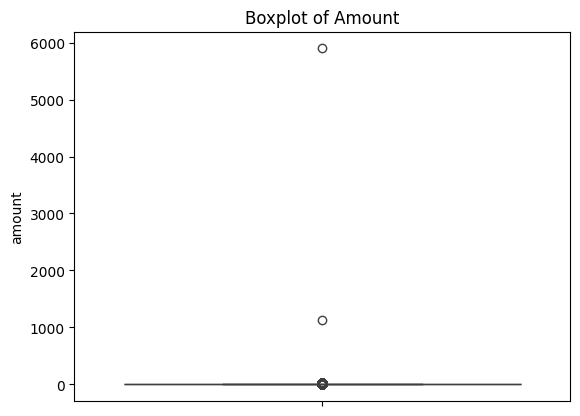

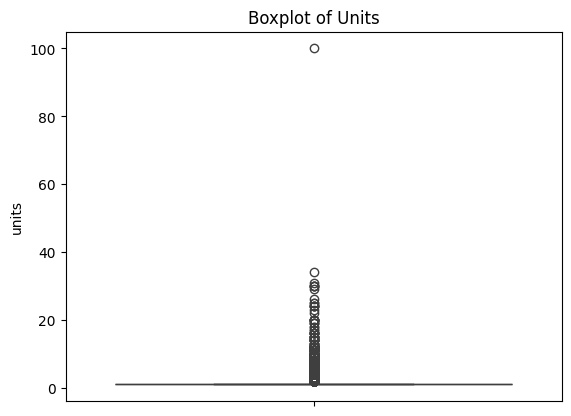

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(selected_sales['amount'])
plt.title("Boxplot of Amount")
plt.show()

sns.boxplot(selected_sales['units'])
plt.title("Boxplot of Units")
plt.show()

`This shows high skewness and we will be using IQR to remove the outliers since ther is no normal distribution for Z-score to remove outliers with a viable range` 

#### Cleaning Outliers of Both Amount and Units

In [49]:
# Function to clean outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [50]:
# Cleaning outliers for numerical columns
numerical_columns = ['amount', 'units']
for col in numerical_columns:
    selected_sales = remove_outliers_iqr(selected_sales, col)

print('Cleaned Dataframe: ')
print(selected_sales.head())

Cleaned Dataframe: 
         code  amount  units  time  province  week  supermarket  basket  day  \
0  7680850106    0.80      1  1100         2     1          244       1    1   
1  3620000470    3.59      1  1100         2     1          244       1    1   
2  1800028064    2.25      1  1137         2     1          244       2    1   
3  9999985067    0.85      1  1148         2     1          244       3    1   
4  9999985131    2.19      1  1323         2     1          244       4    1   

   voucher  
0        0  
1        0  
2        0  
3        0  
4        0  


#### Post-Clean Boxplots

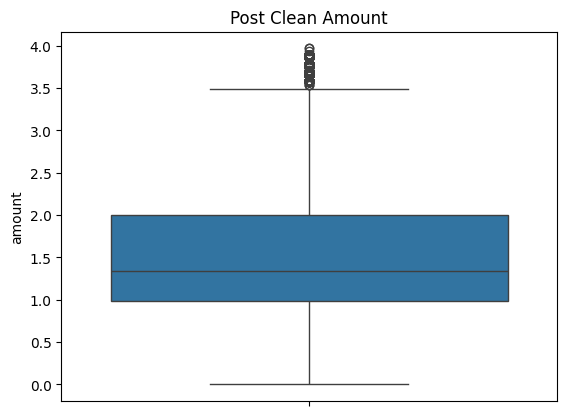

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(selected_sales['amount'])
plt.title("Post Clean Amount")
plt.show()

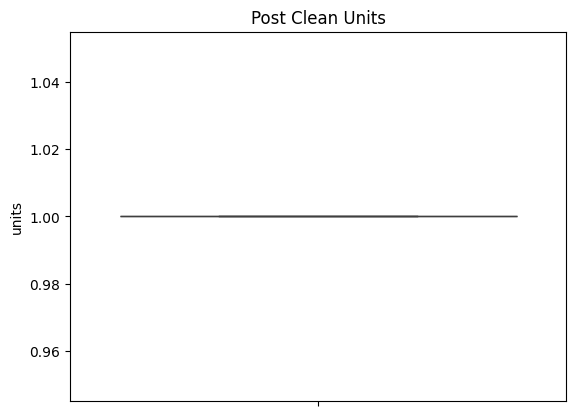

In [52]:
sns.boxplot(selected_sales['units'])
plt.title("Post Clean Units")
plt.show()

`Forecast of sales is based on amount and cannot consider the units to be an input since it should be a prediction as well.`

In [53]:
selected_sales['amount'].describe()

count    878166.000000
mean          1.571284
std           0.778738
min           0.000000
25%           0.990000
50%           1.340000
75%           2.000000
max           3.970000
Name: amount, dtype: float64

### 2.2 Merging Items and Sales Datasets

In [72]:
merged_df = pd.merge(selected_items, selected_sales, on='code', how='inner')
merged_df.shape

(878166, 12)

In [73]:
merged_df.head()

,code,type,brand,amount,units,time,province,week,supermarket,basket,day,voucher
0,3000005040,Type 1,Aunt Jemima,2.49,1,2019,2,1,378,640,1,0
1,3000005040,Type 1,Aunt Jemima,2.49,1,938,2,1,309,1019,1,0
2,3000005040,Type 1,Aunt Jemima,2.49,1,1214,2,1,280,1047,1,0
3,3000005040,Type 1,Aunt Jemima,2.49,1,955,2,1,372,1169,1,0
4,3000005040,Type 1,Aunt Jemima,2.49,1,1101,2,1,372,1171,1,0


In [74]:
merged_df.to_csv('merged_dataset.csv', index=False)

#### Post-Merge Possible Missing Value Removal

In [75]:
import numpy as np

def display_missing_values(df, dataset_name):
    
    df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    print(f"\nMissing value information for {dataset_name}")
    
    #count missnig values in each column 
    missing_info = df.isnull().sum()
    missing_info = missing_info[missing_info > 0] #filter columns with atleast 1 missing value
    
    if not missing_info.empty:
        print('Columns with Missing Values: ')
        print(missing_info)
        print(f"\nTotal columns with missing values: {len(missing_info)}")
    
    else:
        print("No missing values in the dataset")
    

In [76]:
display_missing_values(merged_df, 'merged dataframe')


Missing value information for merged dataframe
No missing values in the dataset


## 3. Feature Engineering

Initially, all the data are considered in range of one unit of transaction. It would be ideal to aggregate the sales based on the items under different days. To make the days have more depth, we can incorporate a feature engineering as below.s

Engineered Features include, 
1. Day of week
2. Is Weekend 
3. Lag Sales
4. Rolling Change 


In [77]:
# Group by 'code', 'week', 'day', 'province', 'type', and 'brand'
aggregated_df = merged_df.groupby(['code', 'type', 'brand', 'province', 'week', 'day','supermarket']).agg(
    total_amount=('amount', 'sum'),       # Sum of sales amount
    total_units=('units', 'sum'),         # Sum of units sold
    basket_size_avg=('basket', 'mean')    # Average basket size
).reset_index()

#Display the restructure df 
print(aggregated_df.head())


        code    type          brand  province  week  day  supermarket  \
0  566300023  Type 4  Pine Mountain         1     1    1          188   
1  566300023  Type 4  Pine Mountain         1     1    4          109   
2  566300023  Type 4  Pine Mountain         1     1    6           46   
3  566300023  Type 4  Pine Mountain         1     3   19          176   
4  566300023  Type 4  Pine Mountain         1     3   20           16   

   total_amount  total_units  basket_size_avg  
0          1.69            1         221284.0  
1          3.39            1         228358.0  
2          3.39            1         232247.0  
3          3.39            1         420570.0  
4          3.39            1         422154.0  


In [78]:
aggregated_df.shape

(818107, 10)

In [80]:
aggregated_df['total_amount'].describe()

count    818107.000000
mean          1.686636
std           0.900784
min           0.000000
25%           0.990000
50%           1.500000
75%           2.190000
max          19.900000
Name: total_amount, dtype: float64

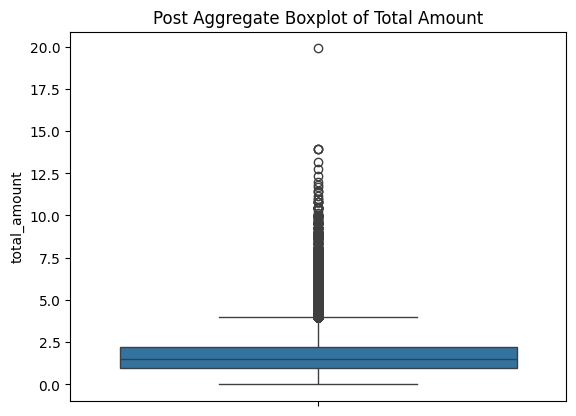

In [81]:
sns.boxplot(aggregated_df['total_amount'])
plt.title("Post Aggregate Boxplot of Total Amount")
plt.show()

In [82]:
aggregated_columns = ['total_amount']

for col in aggregated_columns:
    aggregated_df = remove_outliers_iqr(aggregated_df, col)

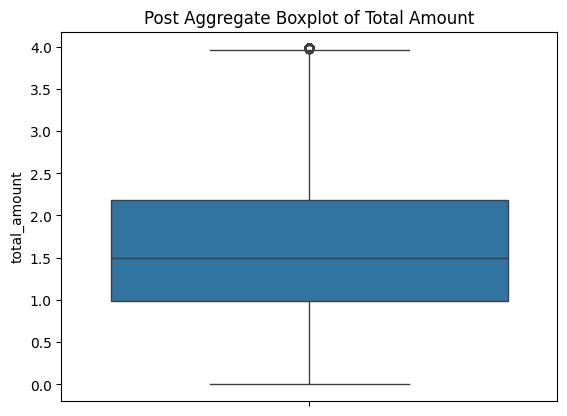

In [83]:
sns.boxplot(aggregated_df['total_amount'])
plt.title("Post Aggregate Boxplot of Total Amount")
plt.show()

In [84]:
aggregated_df.shape

(808703, 10)

In [85]:
aggregated_df.head()

,code,type,brand,province,week,day,supermarket,total_amount,total_units,basket_size_avg
0,566300023,Type 4,Pine Mountain,1,1,1,188,1.69,1,221284.0
1,566300023,Type 4,Pine Mountain,1,1,4,109,3.39,1,228358.0
2,566300023,Type 4,Pine Mountain,1,1,6,46,3.39,1,232247.0
3,566300023,Type 4,Pine Mountain,1,3,19,176,3.39,1,420570.0
4,566300023,Type 4,Pine Mountain,1,3,20,16,3.39,1,422154.0


In [86]:
print(aggregated_df.isnull().sum())

code               0
type               0
brand              0
province           0
week               0
day                0
supermarket        0
total_amount       0
total_units        0
basket_size_avg    0
dtype: int64


#### Day of the Week and Weekend Feature Engineering

In [89]:
aggregated_df['day_of_week'] = (aggregated_df['day'] - 1) % 7 +1
aggregated_df['is_weekend'] = aggregated_df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)


In [93]:
aggregated_df.shape
df = aggregated_df

### Lagged Days and Rolling Averages

In [101]:
df['lag_1_day'] = df.groupby('code')['total_amount'].shift(1)  # Lagged sales for previous day
df['lag_7_days'] = df.groupby('code')['total_amount'].shift(7)  # Lagged sales for 7 days prior

# Calculate rolling sales averages (3-day and 7-day windows)
df['rolling_avg_3_days'] = df.groupby('code')['total_amount'].rolling(window=3).mean().reset_index(0, drop=True)
df['rolling_avg_7_days'] = df.groupby('code')['total_amount'].rolling(window=7).mean().reset_index(0, drop=True)

df['lag_1_day'].fillna(0, inplace=True)
df['lag_7_days'].fillna(0, inplace=True)
df['rolling_avg_3_days'].fillna(0, inplace=True)
df['rolling_avg_7_days'].fillna(0, inplace=True)

In [102]:
# Display the updated dataframe
print("Dataframe with Lagged and Rolling Sales:")
print(df)

Dataframe with Lagged and Rolling Sales:
              code    type                  brand  province  week  day  \
0        566300023  Type 4          Pine Mountain         1     1    1   
1        566300023  Type 4          Pine Mountain         1     1    4   
2        566300023  Type 4          Pine Mountain         1     1    6   
3        566300023  Type 4          Pine Mountain         1     3   19   
4        566300023  Type 4          Pine Mountain         1     3   20   
...            ...     ...                    ...       ...   ...  ...   
818102  9999985766  Type 2  Private Label Premium         2    27  187   
818103  9999985766  Type 2  Private Label Premium         2    27  188   
818104  9999985766  Type 2  Private Label Premium         2    27  189   
818105  9999985766  Type 2  Private Label Premium         2    27  189   
818106  9999985766  Type 2  Private Label Premium         2    27  189   

        supermarket  total_amount  total_units  basket_size_avg  day_o

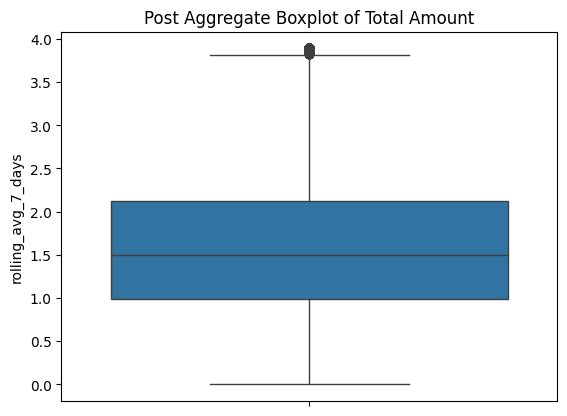

In [106]:
sns.boxplot(df['rolling_avg_7_days'])
plt.title("Post Aggregate Boxplot of Total Amount")
plt.show()

## 4. Problem-Relevant Feature Selection and Scaling

### Correlation calculation between target variable and input features

In [110]:
df.head()

,code,type,brand,province,week,day,supermarket,total_amount,total_units,basket_size_avg,day_of_week,is_weekend,lag_1_day,lag_7_days,rolling_avg_3_days,rolling_avg_7_days
0,566300023,Type 4,Pine Mountain,1,1,1,188,1.69,1,221284.0,1,0,0.00,0.0,0.000000,0.0
1,566300023,Type 4,Pine Mountain,1,1,4,109,3.39,1,228358.0,4,0,1.69,0.0,0.000000,0.0
2,566300023,Type 4,Pine Mountain,1,1,6,46,3.39,1,232247.0,6,1,3.39,0.0,2.823333,0.0
3,566300023,Type 4,Pine Mountain,1,3,19,176,3.39,1,420570.0,5,1,3.39,0.0,3.390000,0.0
4,566300023,Type 4,Pine Mountain,1,3,20,16,3.39,1,422154.0,6,1,3.39,0.0,3.390000,0.0


In [108]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

Correlation Matrix: 
total_amount          1.000000
rolling_avg_3_days    0.941011
rolling_avg_7_days    0.913227
lag_1_day             0.843813
lag_7_days            0.825484
total_units           0.202340
basket_size_avg      -0.016978
Name: total_amount, dtype: float64


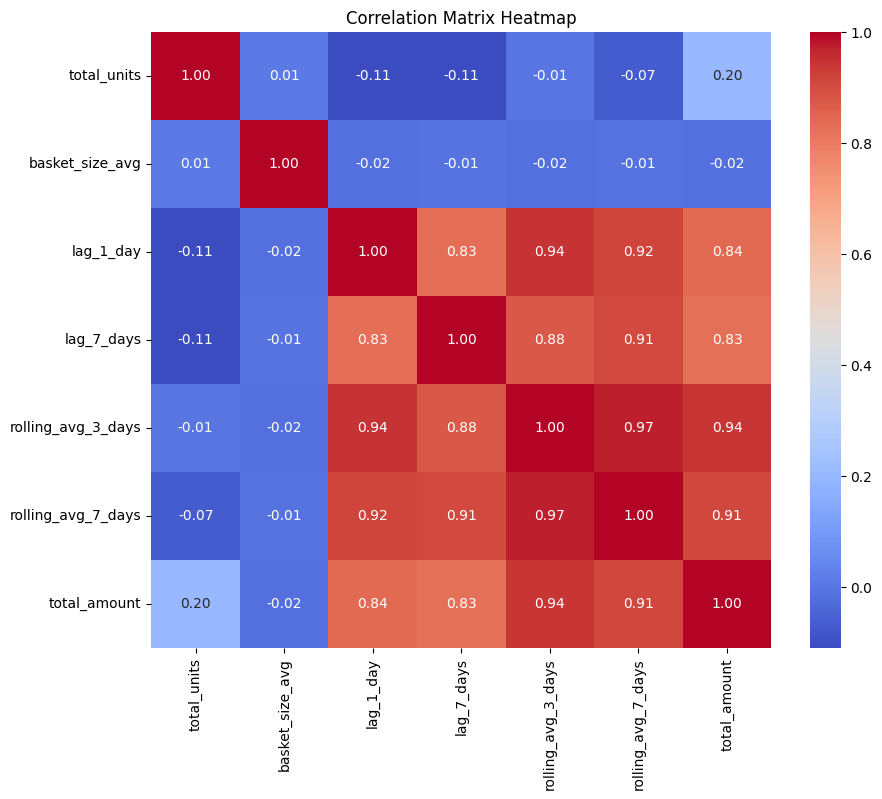

In [114]:
num_features = ['total_units','basket_size_avg', 'lag_1_day', 'lag_7_days', 'rolling_avg_3_days', 'rolling_avg_7_days']
df_numerical = df[num_features + ['total_amount']]

#compute correlation matrix 
correlation_matrix = df_numerical.corr()
print("Correlation Matrix: ")
print(correlation_matrix['total_amount'].sort_values(ascending=False))

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

ANOVA F-test scores
type           1474.526096
brand          1089.380106
province        559.197856
supermarket     386.974447
week            201.406048
day             197.372965
day_of_week       4.918787
is_weekend        3.195822
dtype: float64


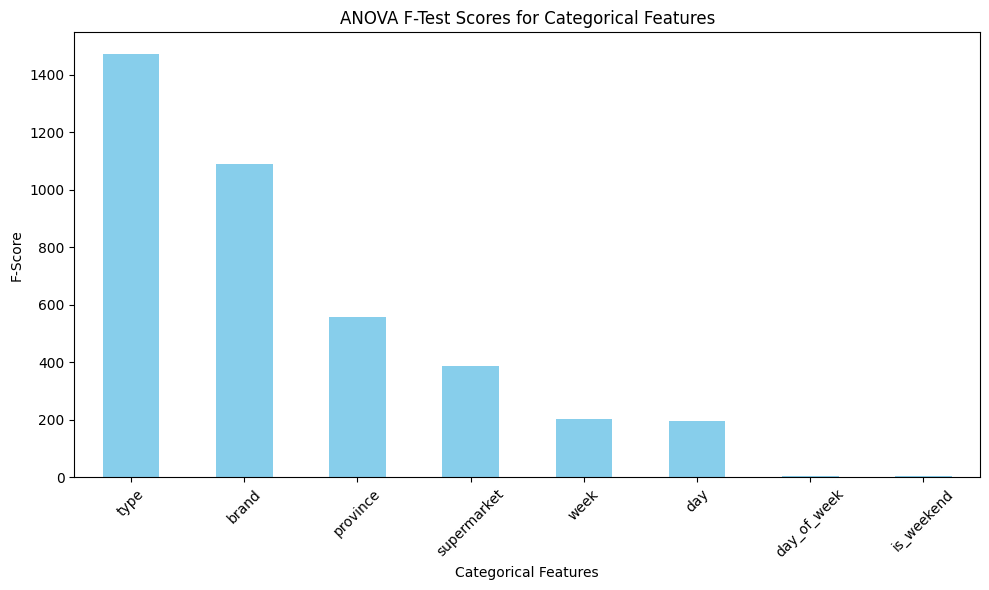

In [115]:
categorical_features = ['brand', 'type', 'province', 'supermarket', 'day','week', 'day_of_week', 'is_weekend']
X_cat = df[categorical_features].apply(LabelEncoder().fit_transform)

#target variable 
y = df['total_amount']

f_scores, p_values = f_classif(X_cat, y)
anova_results = pd.Series(f_scores, index=categorical_features)
print("ANOVA F-test scores")
print(anova_results.sort_values(ascending=False))

# ANOVA F-test scores bar plot
plt.figure(figsize=(10, 6))
anova_results.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("ANOVA F-Test Scores for Categorical Features")
plt.ylabel("F-Score")
plt.xlabel("Categorical Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [112]:
df.to_csv('engineered_dataset/final_dataset.csv', index=False)

In [113]:
print("Shape before duplicate removal: ", df.shape)
df.drop_duplicates()
print("Shape after dropping duplicates", df.shape)

Shape before duplicate removal:  (808703, 16)
Shape after dropping duplicates (808703, 16)


`Based on the AVOVA scores and correlation matrix values, it is evident for us to consider rolling averages and lag sales for the numerical features. But for the categorical values, even though, week, day and weekend related engineered data remains low in terms of value, we will be considering them for they possess a level of time relevance for the predictions`

`Due to multicollinearity, Weeks will be chosen`

In [165]:
#finding the number of unique categories in the categorical features

print(len(df['brand'].unique()))
print(len(df['week'].unique()))
print(len(df['type'].unique()))
print(len(df['province'].unique()))
print(len(df['supermarket'].unique()))

95
25
4
2
376


` To Avoid Data leakage, we do feature scaling once the train, test split is complete`

In [166]:
X_data = df[['type','brand','province','week','supermarket','day_of_week','is_weekend', 'lag_1_day','lag_7_days', 'rolling_avg_3_days', 'rolling_avg_7_days']]
y_data = df[['total_amount']]


In [167]:
X_data['day_of_week']

0         1
1         4
2         6
3         5
4         6
         ..
818102    5
818103    6
818104    7
818105    7
818106    7
Name: day_of_week, Length: 808703, dtype: int64

#### Train Test Split

In [168]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test  = train_test_split(X_data,y_data, train_size=0.2, random_state=42)

In [169]:
y_train.describe()

,total_amount
count,161740.000000
mean,1.643576
std,0.806441
min,0.000000
25%,0.990000
50%,1.500000
75%,2.180000
max,3.980000


### Feature Scaling

`For numerical features, we will be using standard scaling. and for categorical. Various methods will be chosen.`

``

In [170]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [171]:
# Categorical features for different encodings
categorical_one_hot = ['type', 'province']
categorical_ordinal = ['week']
target_encoded_features = ['brand', 'supermarket']

numerical_features = ['lag_1_day', 'lag_7_days', 'rolling_avg_3_days', 'rolling_avg_7_days']


# Target Encoding for high-cardinality features (brand and supermarkets)
target_encoder = ce.TargetEncoder(cols=target_encoded_features)
X_train[target_encoded_features] = target_encoder.fit_transform(X_train[target_encoded_features], y_train)
X_test[target_encoded_features] = target_encoder.transform(X_test[target_encoded_features])


In [172]:
# Define a preprocessor for the remaining features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_one_hot),
        ('ordinal', OrdinalEncoder(), categorical_ordinal),
        ('scaler', StandardScaler(), numerical_features),
        # Target encoded features are already processed, so we passthrough
        ('passthrough', 'passthrough', target_encoded_features)
    ],
    remainder='drop'
)

In [163]:
X_train.to_csv('forecast_dataset/X_train.csv')
X_test.to_csv('forecast_dataset/X_test.csv')
y_train.to_csv('forecast_dataset/y_train.csv')
y_test.to_csv('forecast_dataset/y_test.csv')

In [173]:
# Transform the rest of the features
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().flatten()

In [174]:
print(len(X_train))
print(len(X_test))
print(len(X_train) + len(X_test))

161740
646963
808703


## Model Training and Evaluation

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

### Hyperparameter Tuning and Cross Validations

#### n_estimators = 100

In [178]:
# Initialize the Random Forest Regressor
rf_model_n100 = RandomForestRegressor(n_estimators=100, random_state=42)

# Define K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(rf_model_n100, X_train_transformed, y_train, scoring='neg_mean_squared_error', cv=kfold)

# Convert negative MSE to positive and calculate RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print Cross-Validation Results
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.4f}")
print(f"Standard Deviation of CV RMSE: {cv_rmse_scores.std():.4f}")

# Fit the model on the entire training set
rf_model_n100.fit(X_train_transformed, y_train)

Cross-Validation RMSE Scores: [0.24345689 0.23799756 0.24230255 0.24345455 0.24542463]
Mean CV RMSE: 0.2425
Standard Deviation of CV RMSE: 0.0025


RandomForestRegressor(random_state=42)

#### k = 500, n_splits = 10

In [177]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Define K-Fold Cross Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform Cross-Validation
cv_scores = cross_val_score(rf_model, X_train_transformed, y_train, scoring='neg_mean_squared_error', cv=kfold)

# Convert negative MSE to positive and calculate RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print Cross-Validation Results
print(f"Cross-Validation RMSE Scores: {cv_rmse_scores}")
print(f"Mean CV RMSE: {cv_rmse_scores.mean():.4f}")
print(f"Standard Deviation of CV RMSE: {cv_rmse_scores.std():.4f}")

# Fit the model on the entire training set
rf_model.fit(X_train_transformed, y_train)

Cross-Validation RMSE Scores: [0.24300527 0.24504768 0.24432992 0.23203166 0.24420361 0.23800625
 0.2474002  0.24114669 0.24006467 0.24504443]
Mean CV RMSE: 0.2420
Standard Deviation of CV RMSE: 0.0042


RandomForestRegressor(n_estimators=500, random_state=42)

### GridSearch Hyperparameter Tuning (Time Constraints)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_transformed, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_):.4f}")

### Test Dataset Evaluation

In [179]:
y_pred_100 = rf_model_n100.predict(X_test_transformed)

#Evaluate on the test set 
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_100))
print(f"Test Set RMSE: {test_rmse:.4f}")

Test Set RMSE: 0.2425


In [180]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_transformed)

# Evaluate on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test Set RMSE: {test_rmse:.4f}")

Test Set RMSE: 0.2416


Mean Absolute Percentage Error (MAPE): 6.23%
Regression Accuracy (within 10% margin): 85.36%
Root Mean Squared Error (Rounded): 0.2416261510582957
Mean Absolute Error (Rounded): 0.08575736170383776
R² Score (Rounded): 0.9097022816343008


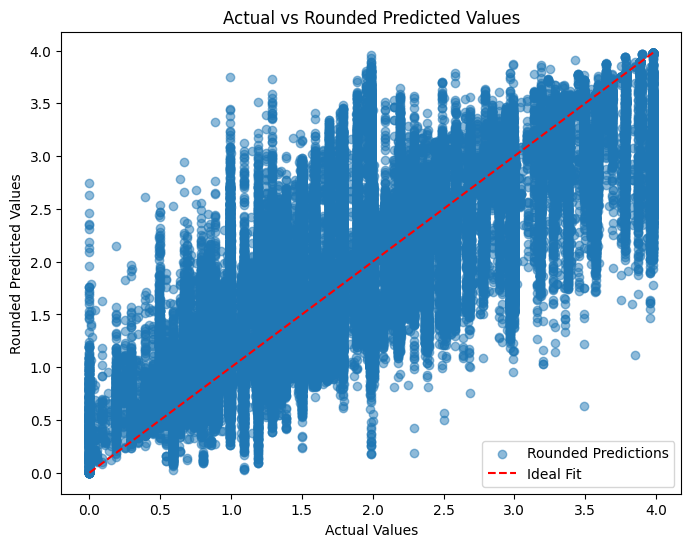

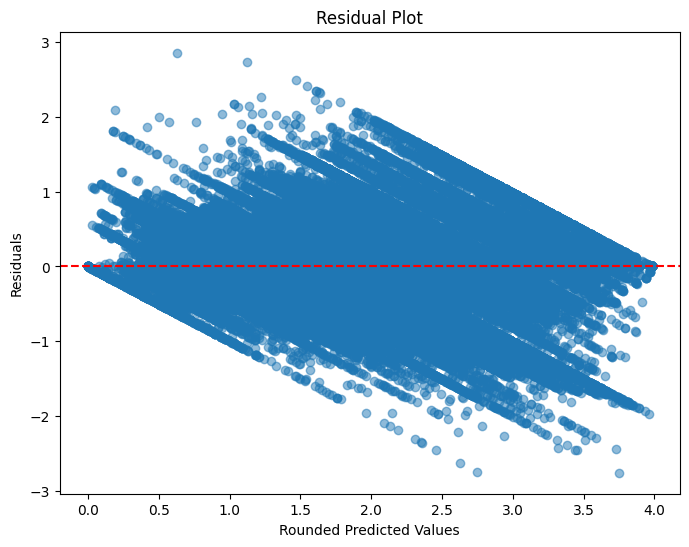

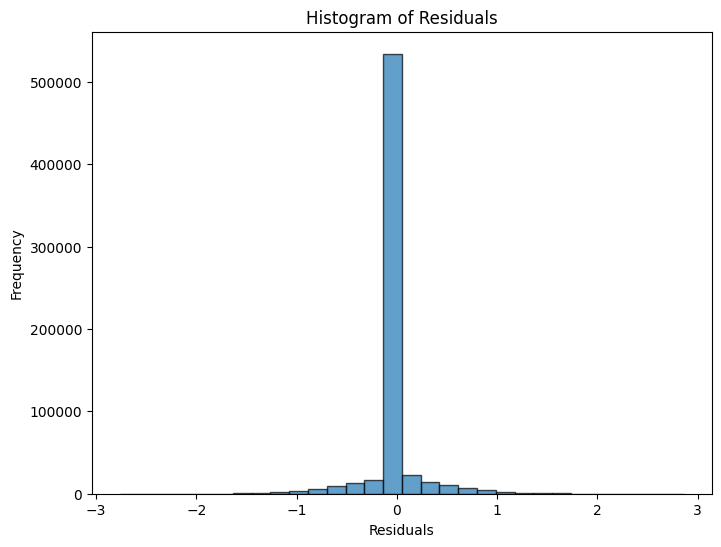

   Actual  Predicted  Error
0    1.09       1.09   0.00
1    2.00       2.00   0.00
2    0.88       0.88   0.00
3    2.79       2.85   0.06
4    1.49       2.01   0.52
5    0.97       0.97   0.00
6    2.79       2.79   0.00
7    1.89       2.74   0.85
8    2.50       2.50   0.00
9    3.98       2.66   1.32


In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_test and y_pred are 1D arrays
y_test_1d = y_test
y_pred_1d = y_pred

# Filter out zero values in y_actual for MAPE and accuracy calculation
non_zero_indices = y_test_1d != 0
y_test_non_zero = y_test_1d[non_zero_indices]
y_pred_non_zero = y_pred_1d[non_zero_indices]

# Calculate MAPE
mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100

# Calculate Regression Accuracy (within 10% margin)
error_margin = 0.10
accurate_predictions = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) <= error_margin
accuracy = np.mean(accurate_predictions) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Regression Accuracy (within 10% margin): {accuracy:.2f}%")

# Round predictions to match the precision of the actual values (2 decimal places)
y_pred_rounded = np.round(y_pred_1d, 2)

# Recalculate metrics with rounded predictions
rmse_rounded = mean_squared_error(y_test_1d, y_pred_rounded, squared=False)
mae_rounded = mean_absolute_error(y_test_1d, y_pred_rounded)
r2_rounded = r2_score(y_test_1d, y_pred_rounded)

print(f"Root Mean Squared Error (Rounded): {rmse_rounded}")
print(f"Mean Absolute Error (Rounded): {mae_rounded}")
print(f"R² Score (Rounded): {r2_rounded}")

# 1. Actual vs Predicted Values (Rounded)
def plot_actual_vs_predicted(y_actual, y_predicted):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5, label="Rounded Predictions")
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Rounded Predicted Values")
    plt.title("Actual vs Rounded Predicted Values")
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1d, y_pred_rounded)

# 2. Residual Plot
def plot_residuals(y_actual, y_predicted):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_predicted, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Rounded Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

plot_residuals(y_test_1d, y_pred_rounded)

# 3. Histogram of Residuals
def plot_residual_histogram(y_actual, y_predicted):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.show()

plot_residual_histogram(y_test_1d, y_pred_rounded)

# Create a comparison table of Actual, Predicted (Rounded), and Error
def comparison_table(y_actual, y_predicted):
    comparison = pd.DataFrame({
        'Actual': y_actual,
        'Predicted': y_predicted,
        'Error': np.abs(y_actual - y_predicted)
    })
    print(comparison.head(10))

comparison_table(y_test_1d, y_pred_rounded)

### Testing Model with 100 Estimators

Mean Absolute Percentage Error (MAPE): 6.24%
Regression Accuracy (within 10% margin): 85.37%
Root Mean Squared Error (Rounded): 0.2424528402176352
Mean Absolute Error (Rounded): 0.08604261758400403
R² Score (Rounded): 0.9090833432991107


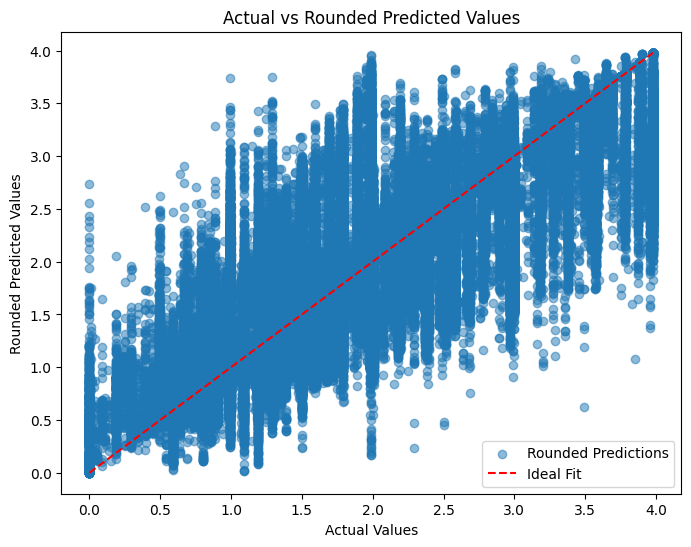

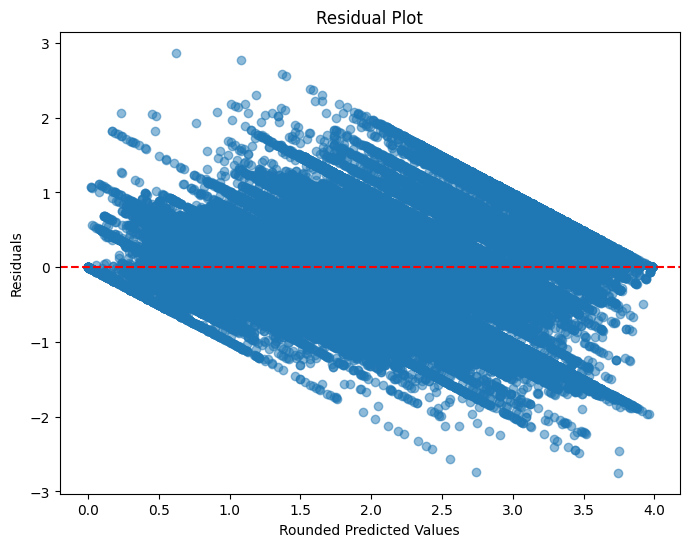

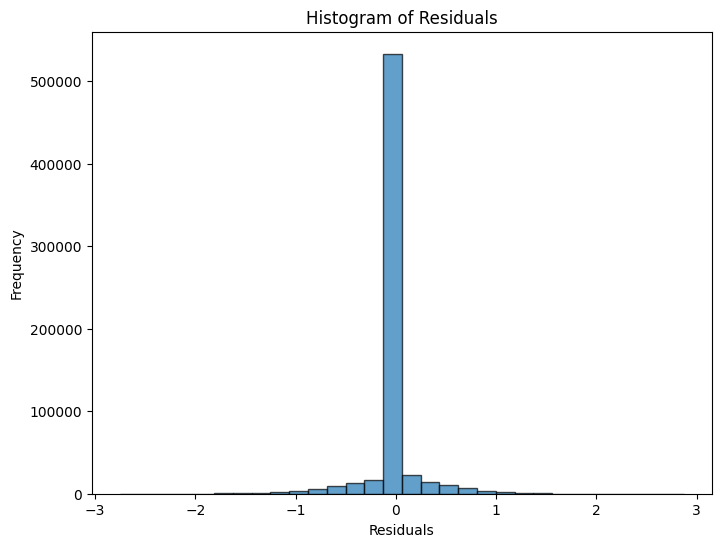

   Actual  Predicted  Error
0    1.09       1.09   0.00
1    2.00       2.00   0.00
2    0.88       0.88   0.00
3    2.79       2.84   0.05
4    1.49       1.97   0.48
5    0.97       0.97   0.00
6    2.79       2.79   0.00
7    1.89       2.78   0.89
8    2.50       2.50   0.00
9    3.98       2.69   1.29


In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure y_test and y_pred are 1D arrays
y_test_1d = y_test
y_pred_1d = y_pred_100

# Filter out zero values in y_actual for MAPE and accuracy calculation
non_zero_indices = y_test_1d != 0
y_test_non_zero = y_test_1d[non_zero_indices]
y_pred_non_zero = y_pred_1d[non_zero_indices]

# Calculate MAPE
mape = np.mean(np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero)) * 100

# Calculate Regression Accuracy (within 10% margin)
error_margin = 0.10
accurate_predictions = np.abs((y_test_non_zero - y_pred_non_zero) / y_test_non_zero) <= error_margin
accuracy = np.mean(accurate_predictions) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Regression Accuracy (within 10% margin): {accuracy:.2f}%")

# Round predictions to match the precision of the actual values (2 decimal places)
y_pred_rounded = np.round(y_pred_1d, 2)

# Recalculate metrics with rounded predictions
rmse_rounded = mean_squared_error(y_test_1d, y_pred_rounded, squared=False)
mae_rounded = mean_absolute_error(y_test_1d, y_pred_rounded)
r2_rounded = r2_score(y_test_1d, y_pred_rounded)

print(f"Root Mean Squared Error (Rounded): {rmse_rounded}")
print(f"Mean Absolute Error (Rounded): {mae_rounded}")
print(f"R² Score (Rounded): {r2_rounded}")

# 1. Actual vs Predicted Values (Rounded)
def plot_actual_vs_predicted(y_actual, y_predicted):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_actual, y_predicted, alpha=0.5, label="Rounded Predictions")
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Rounded Predicted Values")
    plt.title("Actual vs Rounded Predicted Values")
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1d, y_pred_rounded)

# 2. Residual Plot
def plot_residuals(y_actual, y_predicted):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_predicted, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Rounded Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.show()

plot_residuals(y_test_1d, y_pred_rounded)

# 3. Histogram of Residuals
def plot_residual_histogram(y_actual, y_predicted):
    residuals = y_actual - y_predicted
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    plt.show()

plot_residual_histogram(y_test_1d, y_pred_rounded)

# Create a comparison table of Actual, Predicted (Rounded), and Error
def comparison_table(y_actual, y_predicted):
    comparison = pd.DataFrame({
        'Actual': y_actual,
        'Predicted': y_predicted,
        'Error': np.abs(y_actual - y_predicted)
    })
    print(comparison.head(10))

comparison_table(y_test_1d, y_pred_rounded)